# The Mathematical Engineering of Deep Learning

by Benoit Liquet, Sarat Moka, and Yoni Nazarathy

Julia Jupyter Notebook for [Unit 1](https://deeplearningmath.org/supervised-machine-learning.html).

Note that you may need to restart the kernel before running certain cells due to name conflicts and similar issues.

In [25]:
# using Pkg
# Pkg.add("Flux")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("StatsPlots")
# Pkg.add("MultivariateStats")
# Pkg.add("Measures")
# Pkg.add("Clustering")
# Pkg.add("Metalhead")
# Pkg.build()
# Pkg.add("QuartzImageIO")
# Pkg.add("ImageMagick")
# Pkg.add("Distributions")
# Pkg.add("MultivariateStats")
# Pkg.add("RDatasets")
# Pkg.add("DataFrames")
# Pkg.add("LaTeXStrings")
# Pkg.add("MLDatasets")

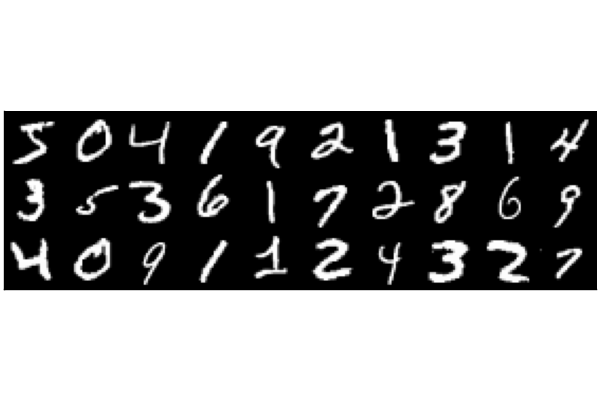

In [2]:
using Plots, Flux.Data.MNIST; pyplot()
imgs = MNIST.images()
heatmap(vcat(hcat(imgs[1:10]...),
             hcat(imgs[11:20]...),
             hcat(imgs[21:30]...)),ticks=false)

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278


(d, n) = (784, 60000)
onMeanIntensity = 0.6833624860322157
prop0 = 0.8087977040816327
prop1 = 0.006681164965986395
Label counts: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

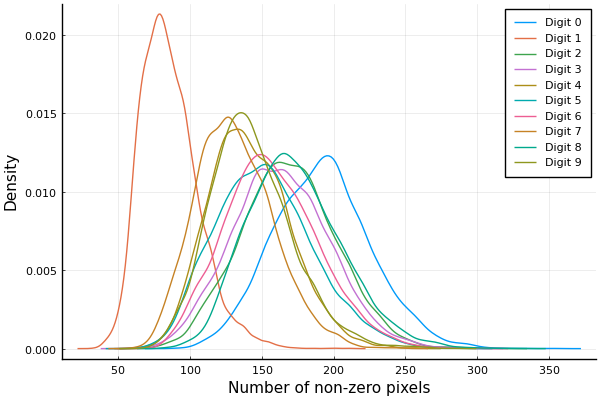

In [6]:
#Basic Exploratory Data Analysis (EDA) for MNIST with Julia
using Statistics, StatsPlots, Plots, Flux.Data.MNIST; pyplot()

imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(float.(im)...) for im in imgs]...)

d, n = size(x)
@show (d,n)

onMeanIntensity = mean(filter((u)->u>0,x))
@show onMeanIntensity

prop0 = sum(x .== 0)/(d*n)
@show prop0

prop1 = sum(x .== 1)/(d*n)
@show prop1

print("Label counts: ", [sum(labels .== k) for k in 0:9])

p = plot()
for k in 0:9
    onPixels = [ sum(x[:,i] .> 0) for i in (1:n)[labels .== k] ]
    p = density!(onPixels, label = "Digit $(k)")
end
plot(p,xlabel="Number of non-zero pixels", ylabel = "Density")

In [22]:
savefig("mnistOnPixels.png")

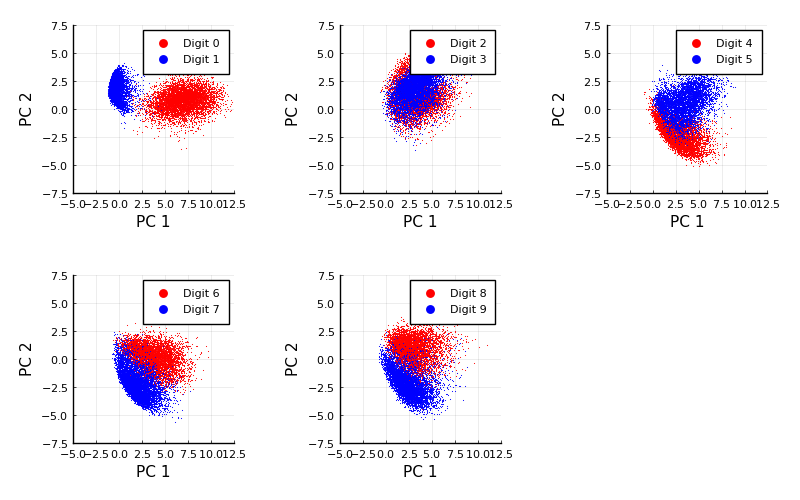

In [18]:
using MultivariateStats, LinearAlgebra, Flux.Data.MNIST, Measures,Plots
pyplot()

imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(float.(im)...) for im in imgs]...)
pca = fit(PCA, x; maxoutdim=2)
M = projection(pca)

function compareDigits(dA,dB)
    imA, imB = imgs[labels .== dA], imgs[labels .== dB]
    xA = hcat([vcat(float.(im)...) for im in imA]...)
    xB = hcat([vcat(float.(im)...) for im in imB]...)
    zA, zB = M'*xA, M'*xB
    default(ms=0.8, msw=0, xlims=(-5,12.5), ylims=(-7.5,7.5),
            legend = :topright, xlabel="PC 1", ylabel="PC 2")
    scatter(zA[1,:],zA[2,:], c=:red,  label="Digit $(dA)")
    scatter!(zB[1,:],zB[2,:], c=:blue, label="Digit $(dB)")
end

plots = []
for k in 1:5
    push!(plots,compareDigits(2k-2,2k-1))
end
plot(plots...,size = (800, 500), margin = 5mm)

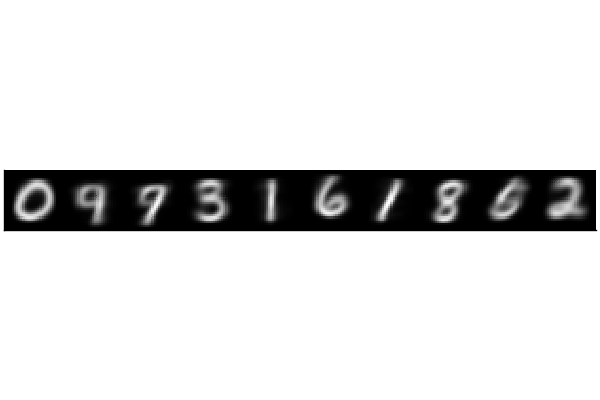

In [8]:
#!! Need to restart kernel after defaults set in example above 
using Clustering, Plots, Flux.Data.MNIST, Random; pyplot()
Random.seed!(0)
imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(Float32.(im)...) for im in imgs]...)
clusterResult = kmeans(x,10)
heatmap(hcat([reshape(clusterResult.centers[:,k],28,28) for k in 1:10]...),
    yflip=true,legend=false,aspectratio = 1,ticks=false,c=cgrad([:black, :white]))

In [7]:
savefig("mnistClustering.png")

## Using a pretrained Neural Network

In [5]:
#Julia code 
using Metalhead

#downloads about 0.5Gb of a pretrained neural network from the web
vgg = VGG19();
vgg.layers

Chain(Conv((3, 3), 3=>64, relu), Conv((3, 3), 64=>64, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 64=>128, relu), Conv((3, 3), 128=>128, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 128=>256, relu), Conv((3, 3), 256=>256, relu), Conv((3, 3), 256=>256, relu), Conv((3, 3), 256=>256, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 256=>512, relu), Conv((3, 3), 512=>512, relu), Conv((3, 3), 512=>512, relu), Conv((3, 3), 512=>512, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 512=>512, relu), Conv((3, 3), 512=>512, relu), Conv((3, 3), 512=>512, relu), Conv((3, 3), 512=>512, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), #44, Dense(25088, 4096, relu), Dropout(0.5), Dense(4096, 4096, relu), Dropout(0.5), Dense(4096, 1000), softmax)

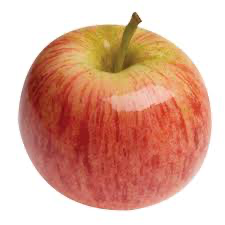

In [6]:
#download an arbitrary image and try to classify it
download("https://deeplearningmath.org/data/images/appleFruit.jpg","appleFruit.jpg");
img = load("appleFruit.jpg")

In [8]:
@time begin
    classify(vgg,img)
end

  0.455828 seconds (1.07 k allocations: 480.524 MiB)


"Granny Smith"

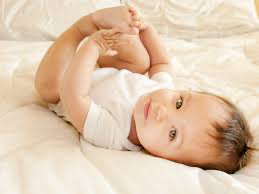

In [9]:
#and again
download("https://deeplearningmath.org/data/images/baby.jpg","baby.jpg");
img = load("baby.jpg")

In [10]:
classify(vgg,img)

"diaper, nappy, napkin"

# A primative classifier

Best theta = 0.865 with F1 value of 0.9028719433229222
On test set:
(TP, FN, FP, TN) = (1000, 135, 84, 8781)
(recall, precision) = (0.8810572687224669, 0.922509225092251)
F1test = 0.9013068949977467


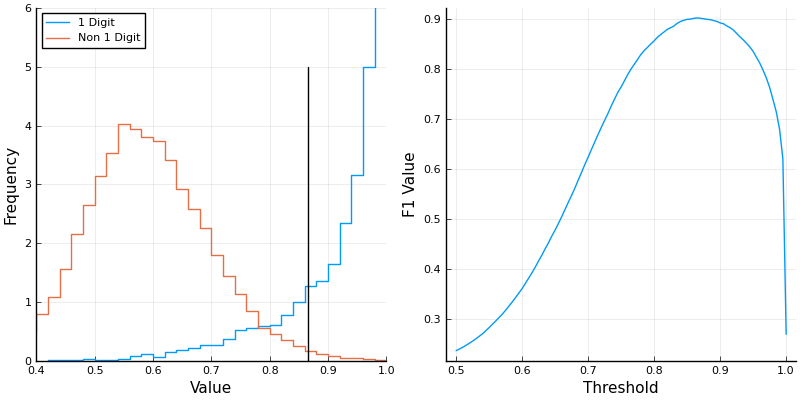

In [1]:
using MLDatasets, StatsBase, Measures, Plots; pyplot()

xTrain, yTrain = MLDatasets.MNIST.traindata(Float32)
xTest, yTest = MLDatasets.MNIST.testdata(Float32)
nTrain, nTest = size(xTrain)[3], size(xTest)[3]
trainData = [xTrain[:,:,k]' for k in 1:nTrain]
testData = [xTest[:,:,k]' for k in 1:nTest]
positiveTrain = trainData[yTrain .== 1]
negativeTrain = trainData[yTrain .!= 1]
testLabels = yTest .== 1

function peakProp(img)
	peakSum = 0.0
	for j in 1:28
		m = argmax(img[j,:])
		(m <=2 || m >= 26) && continue
		peakSum += sum(img[j,m-2:m+2])
	end
	peakSum/sum(img)
end
predict(img,theta) = peakProp(img) <= theta ? false : true
function F1value(theta)
	predictionOnPositive = predict.(positiveTrain,theta)
	predictionOnNegative = predict.(negativeTrain,theta)
	TP = sum(predictionOnPositive)
	FN = sum(1 .- predictionOnPositive)
	FP = sum(predictionOnNegative)
	TN = sum(1 .- predictionOnNegative)
	recall, precision = TP/(TP + FN), TP/(TP + FP)
	return 2*(precision*recall)/(precision+recall)
end

psPositive, psNegative = peakProp.(positiveTrain), peakProp.(negativeTrain)
thetaRange = 0.5:0.005:1
f1Values = F1value.(thetaRange)

bestF1, bestIndex = findmax(f1Values)
bestTheta = thetaRange[bestIndex]
println("Best theta = ", bestTheta, " with F1 value of ", bestF1)

println("On test set:")
testPredictions = predict.(testData,bestTheta)
TP, FN = sum(testPredictions[testLabels]), sum(.!testPredictions[testLabels])
FP, TN = sum(testPredictions[.!testLabels]), sum(.!testPredictions[.!testLabels])
recall, precision = TP/(TP + FN), TP/(TP + FP)
F1test = harmmean([precision,recall])
@show TP, FN, FP, TN; @show recall, precision; @show F1test

p1 = stephist(psPositive, normed = true, label="1 Digit",bins=50)
stephist!(psNegative, normed = true, xlim=(0.4,1), ylim=(0,6),bins=50,
			xlabel = "Value", ylabel = "Frequency",
			label="Non 1 Digit")
plot!([bestTheta,bestTheta],[0,5], c =:black, label = :none)
p2 = plot(thetaRange,f1Values, legend = false,
	xlabel = "Threshold", ylabel = "F1 Value")
plot!([bestTheta],[bestF1], c=:black)
plot(p1,p2,size=(800,400))

## A linear classifier for MNIST

In [13]:
using Flux, Flux.Data.MNIST, LinearAlgebra
using Flux: onehotbatch

imgs   = Flux.Data.MNIST.images()
labels = Flux.Data.MNIST.labels()
nTrain = length(imgs)
trainData = vcat([hcat(float.(imgs[i])...) for i in 1:nTrain]...)
trainLabels = labels[1:nTrain]
testImgs = Flux.Data.MNIST.images(:test)
testLabels = Flux.Data.MNIST.labels(:test)
nTest = length(testImgs)
testData = vcat([hcat(float.(testImgs[i])...) for i in 1:nTest]...)

A = [ones(nTrain) trainData]
Adag = pinv(A)
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(trainLabels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

classifyF(input) = findmax([([1 ; input])'*bets[k] for k in 1:10])[2]-1

predictions = [classifyF(testData[k,:]) for k in 1:nTest]
confusionMatrix = [sum((predictions .== i) .& (testLabels .== j))
				for i in 0:9, j in 0:9]
accuracy = sum(diag(confusionMatrix))/nTest

println("Accuracy: ", accuracy, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)

Accuracy: 0.8603
Confusion Matrix:
10×10 Array{Int64,2}:
 944     0   18    4    0   23   18    5   14   15
   0  1107   54   17   22   18   10   40   46   11
   1     2  813   23    6    3    9   16   11    2
   2     2   26  880    1   72    0    6   30   17
   2     3   15    5  881   24   22   26   27   80
   7     1    0   17    5  659   17    0   40    1
  14     5   42    9   10   23  875    1   15    1
   2     1   22   21    2   14    0  884   12   77
   7    14   37   22   11   39    7    0  759    4
   1     0    5   12   44   17    0   50   20  801

## Improving the linear classifier 

In [36]:
using Flux, Flux.Data.MNIST, LinearAlgebra, Random, Distributions
using Flux: onehotbatch

imgs   = Flux.Data.MNIST.images()
labels = Flux.Data.MNIST.labels()
nTrain = length(imgs)
trainData = vcat([hcat(float.(imgs[i])...) for i in 1:nTrain]...)
trainLabels = labels[1:nTrain]
testImgs = Flux.Data.MNIST.images(:test)
testLabels = Flux.Data.MNIST.labels(:test)
nTest = length(testImgs)
testData = vcat([hcat(float.(testImgs[i])...) for i in 1:nTest]...)

Random.seed!(0)
wS = rand(784) .- 0.5
bS = 0.0
bestAcc = 0.0

α₀, α₁ = 2, 0.1

for epoch in 1:5
    @show epoch
    rn = rand(Normal(),784)
    w = wS + α₁*rn/norm(rn)
    b = bS + α₀*rand(Normal())

    trainDataPos = trainData[(trainData*w .+ b) .>= 0,:]
    trainLabelsPos = trainLabels[(trainData*w .+ b) .>= 0]
    nPos = length(trainLabelsPos)

    trainDataNeg = trainData[(trainData*w .+ b) .< 0,:]
    trainLabelsNeg = trainLabels[(trainData*w .+ b) .< 0]
    nNeg = length(trainLabelsNeg)

    @show nPos,nNeg

    Ap = [ones(nPos) trainDataPos]
    AdagPos = pinv(Ap)

    An = [ones(nNeg) trainDataNeg]
    AdagNeg = pinv(An)

    tfPM(x) = x ? +1 : -1
    yDatPos(k) = tfPM.(onehotbatch(trainLabelsPos,0:9)'[:,k+1])
    yDatNeg(k) = tfPM.(onehotbatch(trainLabelsNeg,0:9)'[:,k+1])
    betsPos = [AdagPos*yDatPos(k) for k in 0:9]
    betsNeg = [AdagNeg*yDatNeg(k) for k in 0:9]

    classifyF(input) = findmax([
            (input'w+b >= 0 ? 
                ([1 ; input])'*betsPos[k] 
                  :
                ([1 ; input])'*betsNeg[k])
            for k in 1:10])[2]-1

    predictions = [classifyF(testData[k,:]) for k in 1:nTest]
    accuracy = sum(predictions .== testLabels)/nTest
    @show accuracy 
    if accuracy > bestAcc
        bestAcc = accuracy
        wS, bs = w, b
        println("Found improvement")
    else
        println("No improvement in this step")
    end
    println()
end
println("\nFinal accuracy: ", bestAcc)

epoch = 1
(nPos, nNeg) = (36101, 23899)
accuracy = 0.868
Found improvement

epoch = 2
(nPos, nNeg) = (31267, 28733)
accuracy = 0.8687
Found improvement

epoch = 3
(nPos, nNeg) = (43458, 16542)
accuracy = 0.8616
No improvement in this step

epoch = 4
(nPos, nNeg) = (27326, 32674)
accuracy = 0.8709
Found improvement

epoch = 5
(nPos, nNeg) = (26633, 33367)
accuracy = 0.8698
No improvement in this step


Final accuracy: 0.8709


# Ridge regression and k-fold cross validation

Losing 9 observations.
Found best lambda for regularization: 7600
Beta estimate: [2.207, 3.754, 32.339]


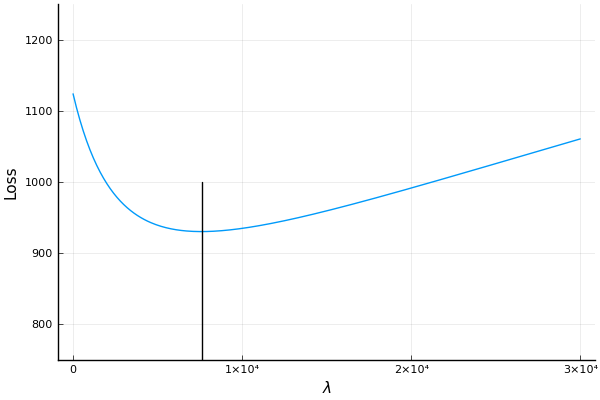

In [28]:
using RDatasets, DataFrames, Random, Statistics, LinearAlgebra
using MultivariateStats, LaTeXStrings, Plots; pyplot()
Random.seed!(0)

df = RDatasets.dataset("MASS", "cpus")
n = size(df)[1]
df = df[shuffle(1:n),:]

K = 10
nG = Int(floor(n/K))
n = K*nG
println("Losing $(size(df)[1] - n) observations.")

lamGrid = 0:100:30000

devSet(k) = collect(1+nG*(k-1):nG*k)
trainSet(k) = setdiff(1:n,devSet(k))

xTrain(k) = convert(Array{Float64,2},df[trainSet(k),[:Cach, :ChMin]])
xDev(k) = convert(Array{Float64,2},df[devSet(k),[ :Cach, :ChMin]])

yTrain(k) = convert(Array{Float64,1},df[trainSet(k),:Perf])
yDev(k) = convert(Array{Float64,1},df[devSet(k),:Perf])

errVals = zeros(length(lamGrid))
for (i,lam) in enumerate(lamGrid)
    errSamples = zeros(K)
    for k in 1:K
        beta = ridge(xTrain(k),yTrain(k),lam)
        errSamples[k] = norm([ones(nG) xDev(k)]*beta - yDev(k) )^2
    end
    errVals[i] = sqrt(mean(errSamples))
end

i = argmin(errVals)
bestLambda = lamGrid[i]

betaFinal = ridge(convert(Array{Float64,2},df[:,[:Cach, :ChMin]]),
                  convert(Array{Float64,1},df[:,:Perf]),bestLambda)

macro RR(x) return:(round.($x,digits = 3)) end
println("Found best lambda for regularization: ", bestLambda)
println("Beta estimate: ", @RR betaFinal)

plot(lamGrid, errVals,legend = false,
     xlabel = L"\lambda", ylabel = "Loss")
plot!([bestLambda,bestLambda],[0,10^3], c = :black, ylim = (750, 1250))